# Datos ENEL

Se leen los datos entregados por el enel, se juntan en un solo archivo y se revisa la cantidad de datos faltantes

In [1]:
import os
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from tqdm import tqdm

In [6]:
current_dir = os.path.join(os.getcwd(), "\Data\Datos_ENEL_TemperaturaSD\METEO")
#\Data\Datos_ENEL_TemperaturaSD\METEO
print(current_dir)

C:\Data\Datos_ENEL_TemperaturaSD\METEO


In [2]:
current_dir = os.getcwd()
print(current_dir)

C:\Users\Sony\OneDrive - Universidad de los andes\2021-1\1. Tesis temperatura\ProyectoGrado\Data\Datos_ENEL_TemperaturaSD\METEO


In [3]:
pyranometers = pd.DataFrame()
meteost = pd.DataFrame()

In [5]:
# Se leen todos los archivos y se ponen en una única tabla

folders = os.listdir()
if 'DatosEnel.ipynb' in folders:
    folders.remove('DatosEnel.ipynb')
if '.ipynb_checkpoints' in folders:
    folders.remove('.ipynb_checkpoints')

for folder in folders:
    sub_folders = os.listdir(os.path.join(os.getcwd(),folder))
    
    for sub_folder in tqdm(sub_folders):
        files = [f for f in os.listdir(os.path.join(os.getcwd(),folder,sub_folder))]
        
        for file in files:
            
            read_first_file = False
            read_second_file = False
            
            try:
            
                # Sheet 0
                df_temp_pyranometers = pd.read_excel(os.path.join(os.getcwd(), folder, sub_folder, file), header = 5, 
                                                     sheet_name = 0)
                df_temp_pyranometers = df_temp_pyranometers.drop(0).reset_index(drop=True)
                read_first_file = True
                
            except: 
                print("No se pudo leer pyranometers del archivo {}".format(file))
                
            try:
            
                # Sheet 1
                df_temp_meteost = pd.read_excel(os.path.join(os.getcwd(), folder, sub_folder, file), header = 10, sheet_name = 1,
                                   usecols=lambda x: 'Unnamed' not in x)
                df_temp_meteost = df_temp_meteost.drop(0).reset_index(drop=True)
                read_second_file = True
                
            except:  
                print("No se pudo leer meteost del archivo {}".format(file))
                
            
            if read_first_file:
                pyranometers = pd.concat([pyranometers,df_temp_pyranometers])
                
            if read_second_file:
                meteost = pd.concat([meteost,df_temp_meteost])

100%|████████████████████████████████████████████████████████████████████████████████████| 2/2 [01:50<00:00, 66.51s/it]


In [6]:
meteost = meteost.reset_index(drop=True)
pyranometers = pyranometers.reset_index(drop=True)

In [7]:
# Tamaños de los archivos
print("El tamaño de 'meteost' es de {}".format(meteost.shape))
print("El tamaño de 'pyranometers' es de {}".format(pyranometers.shape))

El tamaño de 'meteost' es de (876138, 11)
El tamaño de 'pyranometers' es de (445578, 13)


In [8]:
# Cantidad de vacíos
meteost.isna().sum()

FECHA                         0
Ambient Temp [°C]          4066
Pressure         [hPa]     4066
Humidity           [%]     4066
Wind Direction             4066
Wind Speed [m/s]           4066
Radiance 1 [w/m2]          4066
Radiance 2 [w/m2]         18486
Horizontal Rad [w/m2]     18486
Diffuse Rad [w/m2]        18486
Rain             [mm]     18416
dtype: int64

In [9]:
# Cantidad de vacíos ( en %)
100*meteost.isna().sum()/meteost.shape[0]

FECHA                     0.000000
Ambient Temp [°C]         0.464082
Pressure         [hPa]    0.464082
Humidity           [%]    0.464082
Wind Direction            0.464082
Wind Speed [m/s]          0.464082
Radiance 1 [w/m2]         0.464082
Radiance 2 [w/m2]         2.109942
Horizontal Rad [w/m2]     2.109942
Diffuse Rad [w/m2]        2.109942
Rain             [mm]     2.101952
dtype: float64

In [9]:
# Cantidad de vacíos
pyranometers.isna().sum()

Fecha     0
CU 1      0
CU 2      0
CU 3      0
CU 4      0
CU 5      0
CU 6      0
CU 7      0
CU 8      0
CU 9      0
 CU 10    0
Cu 11     0
CU 12     0
dtype: int64

Para 'meteost' hay datos faltantes, pero son menores al 2.5%. Para pyranometers no hay datos faltantes.

In [10]:
# Columnas
meteost.columns

Index(['FECHA', 'Ambient Temp [°C]', 'Pressure         [hPa]',
       'Humidity           [%]', 'Wind Direction ', 'Wind Speed [m/s]',
       'Radiance 1 [w/m2]', 'Radiance 2 [w/m2]', 'Horizontal Rad [w/m2]',
       'Diffuse Rad [w/m2]', 'Rain             [mm]'],
      dtype='object')

In [11]:
# Columnas
pyranometers.columns

Index(['Fecha', 'CU 1', 'CU 2', 'CU 3', 'CU 4', 'CU 5', 'CU 6', 'CU 7', 'CU 8',
       'CU 9', ' CU 10', 'Cu 11', 'CU 12'],
      dtype='object')

In [12]:
# fechas
print("Fecha mínima {}".format(meteost["FECHA"].min()))
print("Fecha máxima {}".format(meteost["FECHA"].max()))

Fecha mínima 2019-01-30 06:00:00
Fecha máxima 2021-02-11 00:00:00


In [13]:
meteost[(meteost["FECHA"])<np.datetime64('2020-04-01')].shape

(7210, 11)

Hay 7210 registros con fechas menores a la fecha mínima. Todas marcadas con la fecha "2019-01-30".

In [14]:
# Cantidad de Datos por (intervalo) de hora meteost
meteost["Hour"] = meteost["FECHA"].dt.hour
meteost.groupby("Hour")["FECHA"].count()

Hour
0     18239
1     17940
2     17940
3     17940
4     17940
5     17940
6     18540
7     18540
8     18540
9     18540
10    18540
11    18540
12    18540
13    18540
14    18540
15    18540
16    18540
17    18540
18    17950
19    17940
20    17940
21    17940
22    17940
23    17940
Name: FECHA, dtype: int64

Parece que hay datos de todas las horas.

In [15]:
# Cantidad de Datos por (intervalo) de hora
pyranometers["Hour"] = pyranometers["Fecha"].dt.hour
pyranometers.groupby("Hour")["Fecha"].count()

Hour
6     18540
7     18540
8     18540
9     18540
10    18540
11    18540
12    18540
13    18540
14    18540
15    18540
16    18540
17    18540
18      309
Name: Fecha, dtype: int64

Solo se tienen datos entre las 6 y las 18 horas. En algunos pocos casos hay información a partir de las 18.

In [16]:
# Horas faltantes (No confundir con vacíos) meteost

min_date = np.datetime64('2020-04-01')
max_date = meteost["FECHA"].max()

cantidad_totales = pd.date_range(start = min_date, end = max_date, freq="H" )
faltantes_meteost = cantidad_totales.difference(meteost["FECHA"])

print("Cantidad horas faltantes: {}".format(len(faltantes_meteost)))
print("Cantidad horas Totales: {}".format(len(cantidad_totales)))

faltantes_meteost

Cantidad horas faltantes: 406
Cantidad horas Totales: 7585


DatetimeIndex(['2020-04-28 01:00:00', '2020-04-28 02:00:00',
               '2020-04-28 03:00:00', '2020-04-28 04:00:00',
               '2020-04-28 05:00:00', '2020-04-28 06:00:00',
               '2020-04-28 07:00:00', '2020-04-28 08:00:00',
               '2020-04-28 09:00:00', '2020-04-28 10:00:00',
               ...
               '2020-08-08 14:00:00', '2020-08-08 15:00:00',
               '2020-08-08 16:00:00', '2020-08-08 17:00:00',
               '2020-08-08 18:00:00', '2020-08-08 19:00:00',
               '2020-08-08 20:00:00', '2020-08-08 21:00:00',
               '2020-08-08 22:00:00', '2020-08-08 23:00:00'],
              dtype='datetime64[ns]', length=406, freq=None)

In [17]:
# Horas faltantes (No confundir con vacíos) pyranometers

cantidad_totales = pd.date_range(start = min_date, end = max_date, freq="H" )
cantidad_totales = pd.DatetimeIndex([d for d in cantidad_totales if (d.hour>=6) and (d.hour<18)])
faltantes_pyranometers = cantidad_totales.difference(pyranometers["Fecha"])

print("Cantidad horas faltantes: {}".format(len(faltantes_pyranometers)))
print("Cantidad horas Totales: {}".format(len(cantidad_totales)))

faltantes_pyranometers

Cantidad horas faltantes: 216
Cantidad horas Totales: 3792


DatetimeIndex(['2020-04-28 06:00:00', '2020-04-28 07:00:00',
               '2020-04-28 08:00:00', '2020-04-28 09:00:00',
               '2020-04-28 10:00:00', '2020-04-28 11:00:00',
               '2020-04-28 12:00:00', '2020-04-28 13:00:00',
               '2020-04-28 14:00:00', '2020-04-28 15:00:00',
               ...
               '2020-08-08 08:00:00', '2020-08-08 09:00:00',
               '2020-08-08 10:00:00', '2020-08-08 11:00:00',
               '2020-08-08 12:00:00', '2020-08-08 13:00:00',
               '2020-08-08 14:00:00', '2020-08-08 15:00:00',
               '2020-08-08 16:00:00', '2020-08-08 17:00:00'],
              dtype='datetime64[ns]', length=216, freq=None)

In [18]:
# Faltantes por día meteost
df_meteost = pd.DataFrame(data=faltantes_meteost,columns=["Fecha"])
df_meteost["Freq"] = 1
df_meteost["Fecha"] = df_meteost["Fecha"].dt.date
faltantes_dia_meteost = df_meteost.groupby("Fecha")["Freq"].sum()
faltantes_dia_meteost

Fecha
2020-04-28    23
2020-04-29    24
2020-04-30    24
2020-05-01    24
2020-05-02    24
2020-05-03    24
2020-05-04    24
2020-05-05    24
2020-05-06    24
2020-05-07    24
2020-05-08    24
2020-05-09    24
2020-05-10    24
2020-08-05    23
2020-08-06    24
2020-08-07    24
2020-08-08    24
Name: Freq, dtype: int64

<BarContainer object of 17 artists>

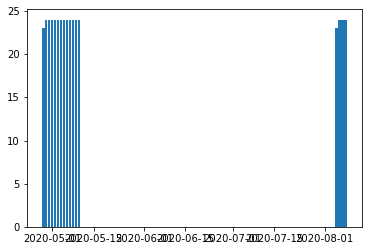

In [19]:
plt.bar(faltantes_dia_meteost.index, faltantes_dia_meteost)

In [20]:
# Faltantes por día pyranometers
df_pyranometers = pd.DataFrame(data=faltantes_pyranometers,columns=["Fecha"])
df_pyranometers["Freq"] = 1
df_pyranometers["Fecha"] = df_pyranometers["Fecha"].dt.date
faltantes_dia_pyranometers = df_pyranometers.groupby("Fecha")["Freq"].sum()
faltantes_dia_pyranometers

Fecha
2020-04-28    12
2020-04-29    12
2020-04-30    12
2020-05-01    12
2020-05-02    12
2020-05-03    12
2020-05-04    12
2020-05-05    12
2020-05-06    12
2020-05-07    12
2020-05-08    12
2020-05-09    12
2020-05-10    12
2020-05-11    12
2020-08-05    12
2020-08-06    12
2020-08-07    12
2020-08-08    12
Name: Freq, dtype: int64

<BarContainer object of 18 artists>

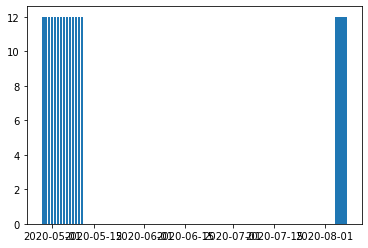

In [21]:
plt.bar(faltantes_dia_pyranometers.index, faltantes_dia_pyranometers)

In [12]:
pyranometers.to_csv('pyranometers.csv', header=True, index=False)
meteost.to_csv('meteost.csv', header=True, index=False)

In [13]:
list(pyranometers)

['Fecha',
 'CU 1',
 'CU 2',
 'CU 3',
 'CU 4',
 'CU 5',
 'CU 6',
 'CU 7',
 'CU 8',
 'CU 9',
 ' CU 10',
 'Cu 11',
 'CU 12']